In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df =pd.read_csv(r'C:\Users\r.vardhan.reddy\Desktop\Data\concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
x=df.drop(columns='strength')

In [10]:
y=df['strength']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [12]:
#Applying Regreesion without transformation
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.6081118525118778

In [14]:
## crosschecking with crossval
cross_val_score(lr,x,y,scoring='r2')

array([0.60623239, 0.64695454, 0.61555076, 0.61208575, 0.52561826])

In [15]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.6012883381757208

## Plotting without Distributions

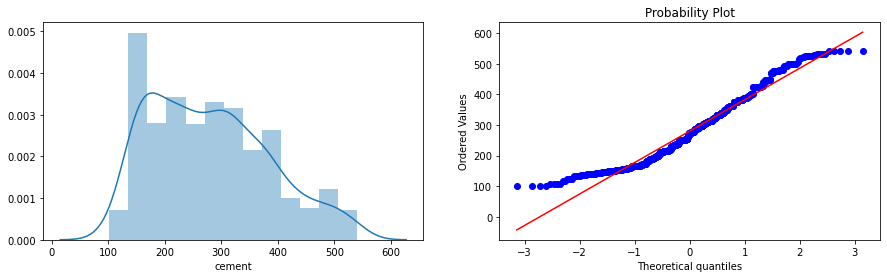

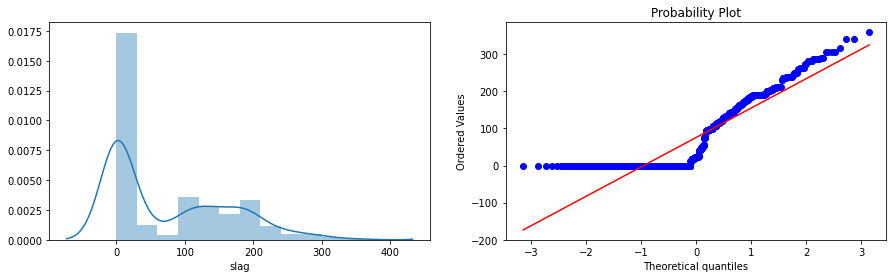

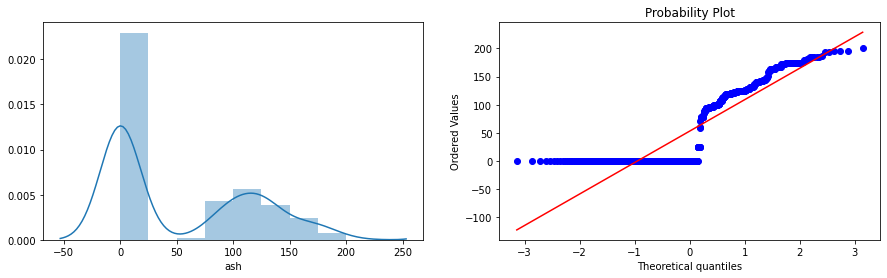

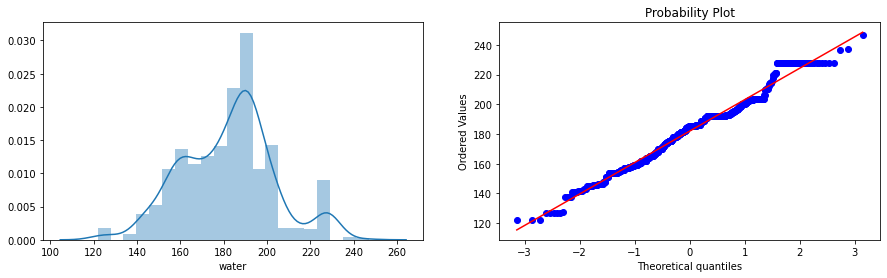

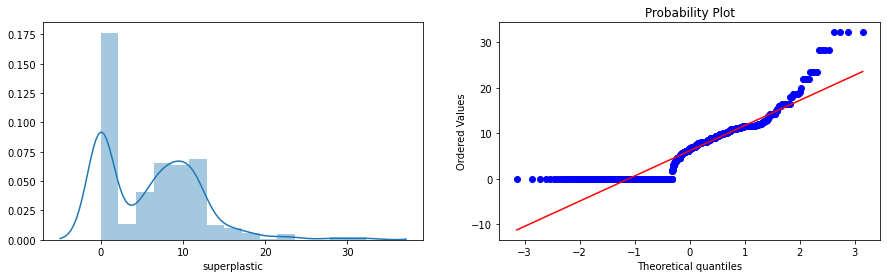

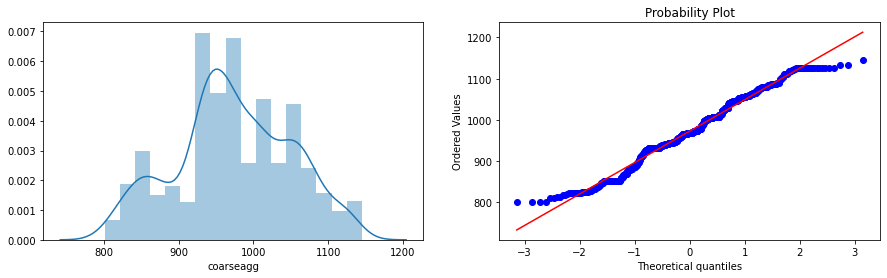

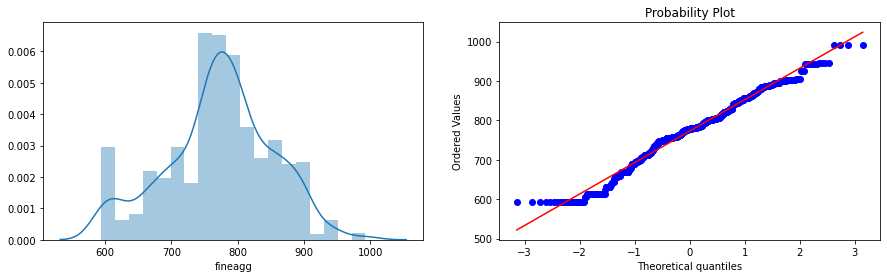

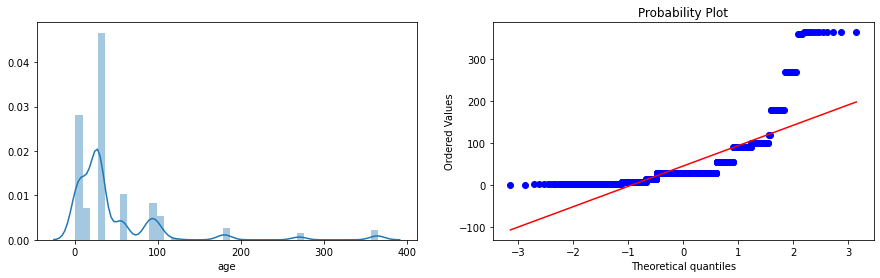

In [24]:
for col in x_train.columns :
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(x_train[col])
    plt.subplot(1,2,2)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    

## Box-Cox trasformation

In [26]:
pt = PowerTransformer(method='box-cox')
x_train_transformed = pt.fit_transform(x_train+0.00000001)
x_test_transformed = pt.transform(x_test+0.00000001)
pd.DataFrame({'columns':x_train.columns,'box-cox_lambdas':pt.lambdas_})

,columns,box-cox_lambdas
0,cement,0.177515
1,slag,0.020232
2,ash,-0.029899
3,water,0.853675
4,superplastic,0.074870
5,coarseagg,1.229404
6,fineagg,1.724776
7,age,0.050641


In [27]:
#Applying Regreesion with transformation
lr= LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
r2_score(y_test,y_pred)

0.7818595673721053

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [31]:
np.mean(cross_val_score(lr,x_train_transformed,y_train,scoring='r2'))

0.7973113067042539

## Before and after Box-cox

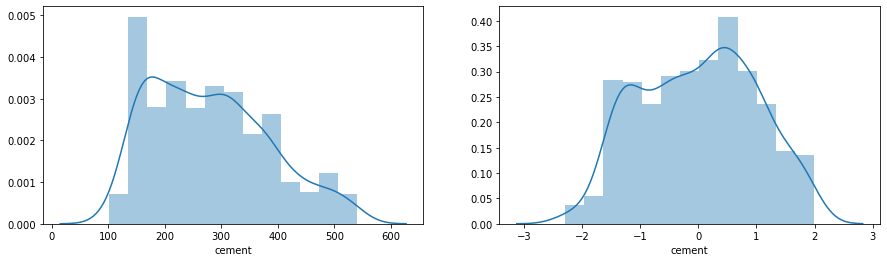

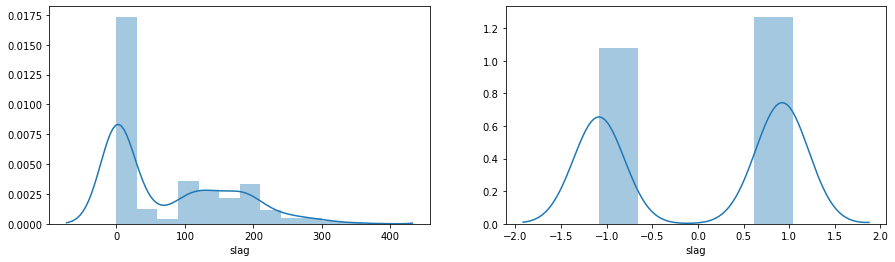

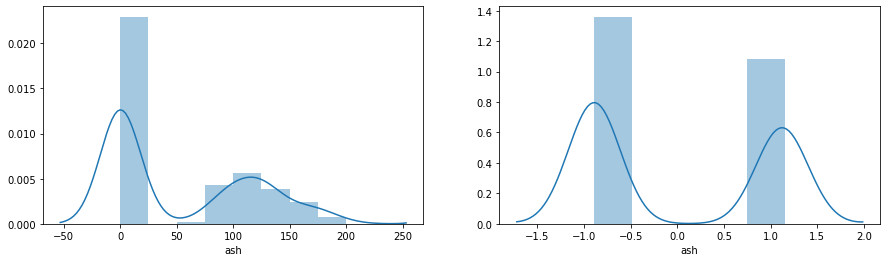

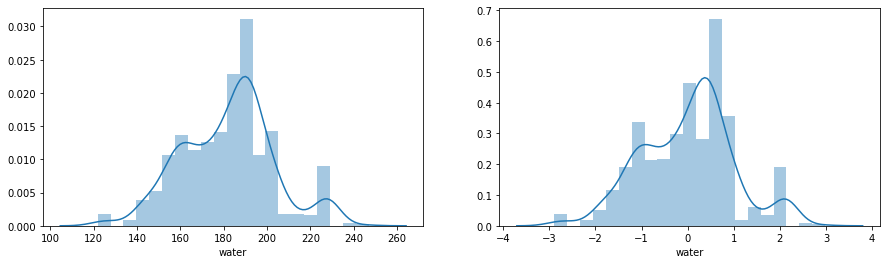

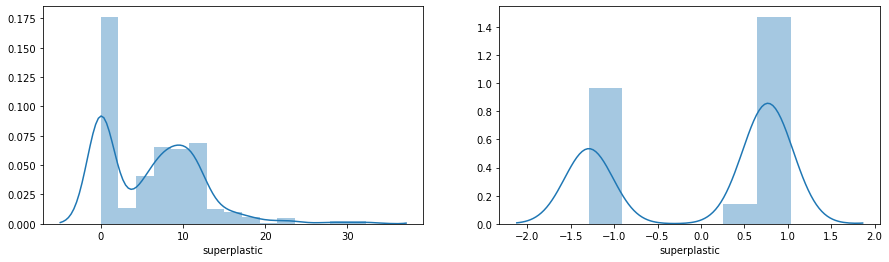

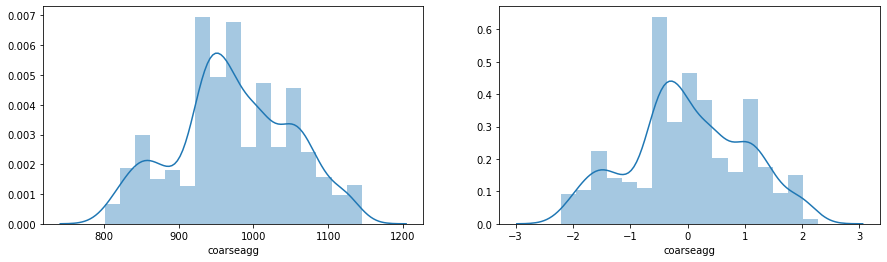

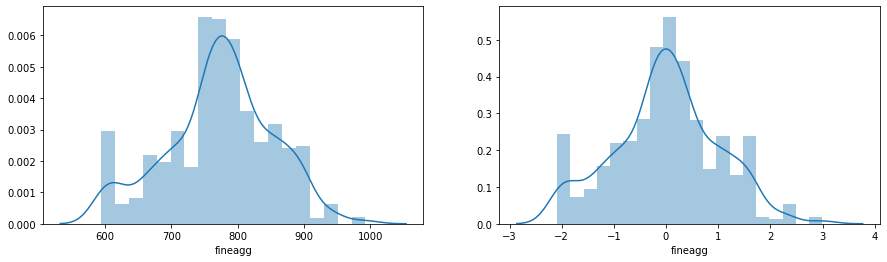

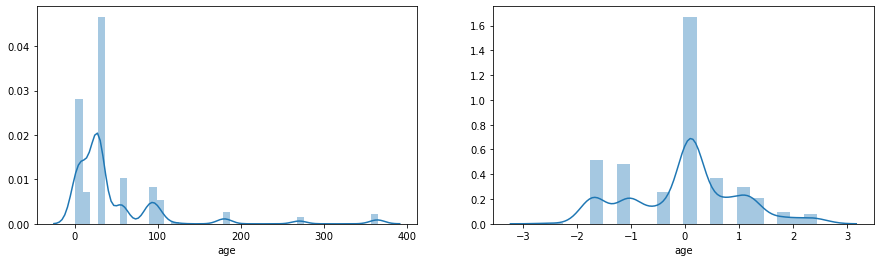

In [32]:
## Before and after Box-cox
x_train_transformed2 = pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train.columns :
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(x_train[col])
    plt.subplot(1,2,2)
    sns.distplot(x_train_transformed2[col])
    plt.show()

## Yeo-Johnsons

In [33]:
## Yeo-Johnsons
pt = PowerTransformer()
x_train_transformed = pt.fit_transform(x_train+0.00000001)
x_test_transformed = pt.transform(x_test+0.00000001)
pd.DataFrame({'columns':x_train.columns,'Yo-Johnsons-lambdas':pt.lambdas_})

,columns,Yo-Johnsons-lambdas
0,cement,0.174823
1,slag,0.018590
2,ash,-0.156230
3,water,0.852831
4,superplastic,0.257780
5,coarseagg,1.229730
6,fineagg,1.725780
7,age,0.002863


In [34]:
#Applying Regreesion with transformation
lr= LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
r2_score(y_test,y_pred)

0.7834235345635743

In [35]:
np.mean(cross_val_score(lr,x_train_transformed,y_train,scoring='r2'))

0.80269997923303

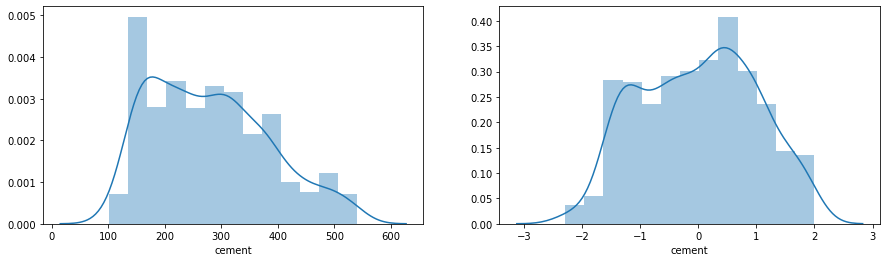

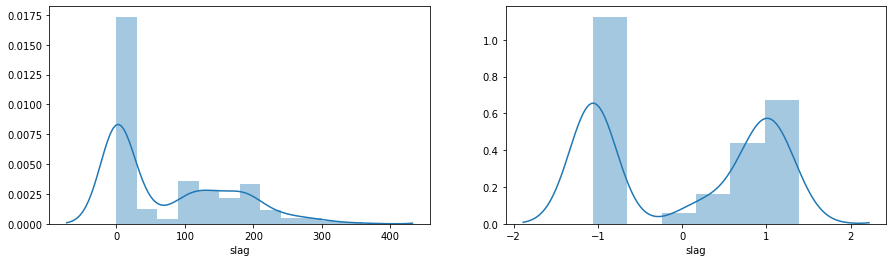

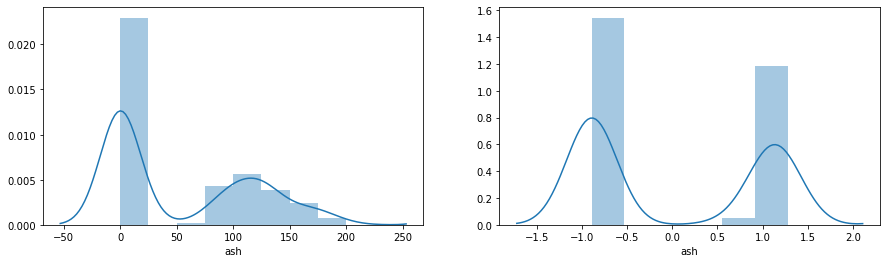

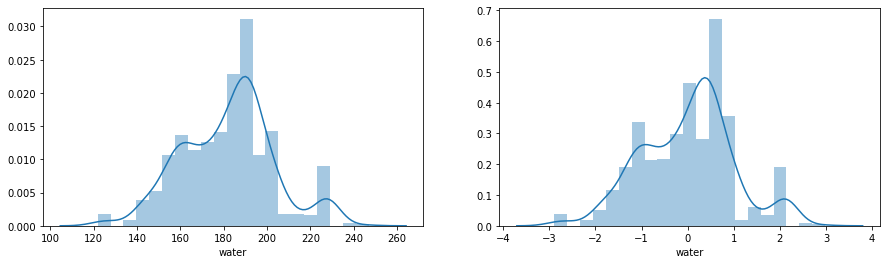

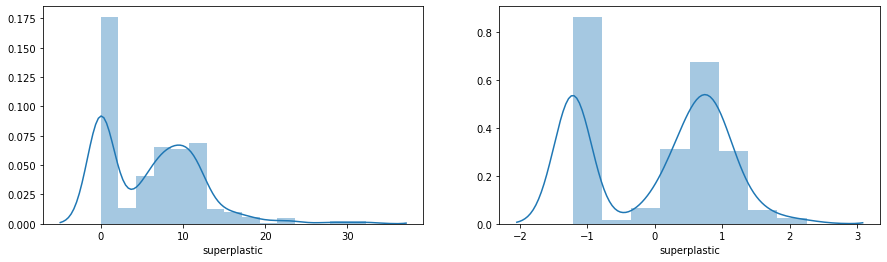

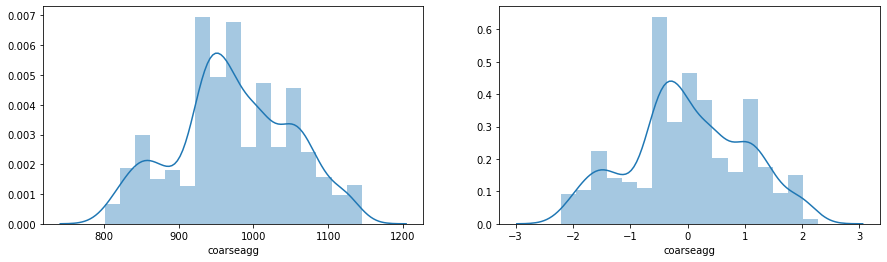

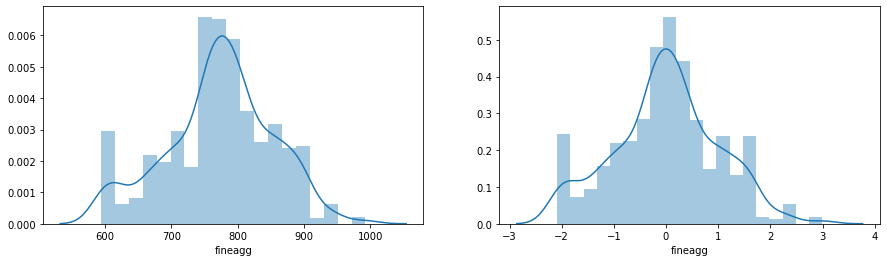

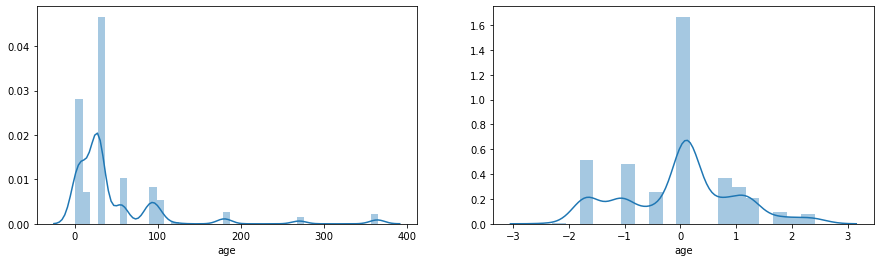

In [36]:
## Before and after Yo-Johnsons
x_train_transformed2 = pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train.columns :
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.distplot(x_train[col])
    plt.subplot(1,2,2)
    sns.distplot(x_train_transformed2[col])
    plt.show()